In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None 

In [22]:
#Cargamos el csv del dia anterior
df = pd.read_csv("../ficheros/diamons_01.csv", index_col = 0)

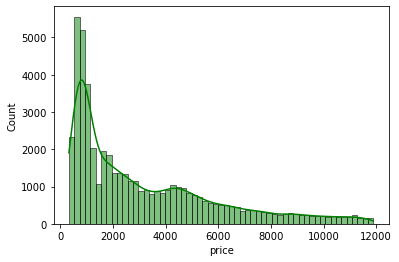

In [23]:
#Realizamos un histograma de nuestra columna respuesta para ver como estan distribuidos los datos
sns.histplot(df["price"], kde = True, color = "green");

Vamos a tratar de normalizar nuestra columna "price" dado que no era normal. Empezamos por la logarítmica.

In [24]:
df["price_log"] = df["price"].apply(lambda x: np.log(x) if x > 0 else 0)

In [25]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_log
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897


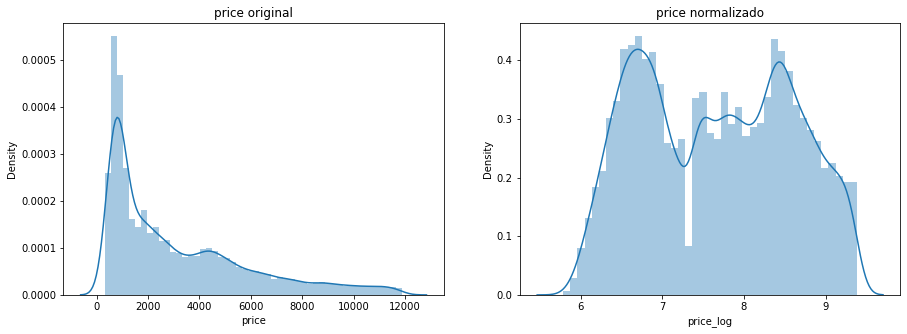

In [26]:
#Realizamos la grafica para comprobar como se ha modificado la distribución de los datos
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df["price"] ,ax = axes[0])
sns.distplot(df["price_log"], ax = axes[1]);

In [27]:
# Realizamos el metodo Shapiro-Wilk para comprobar de  manera analítica
stats.shapiro(df["price_log"])

ShapiroResult(statistic=0.957004189491272, pvalue=0.0)

Aunque la normalizacion mediante logaritmo nos ha variado mucho, sigue dandonos 0. Vamos a tratar normalizar ahora con boxcox

In [28]:
df['price_BOX'], lambda_ajustada = stats.boxcox(df['price'])

In [29]:
lambda_ajustada

-0.024899149880730755

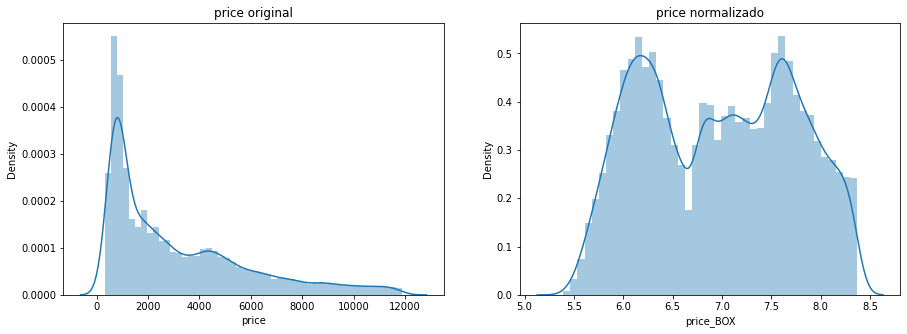

In [30]:
#Realizamos la grafica para comprobar como se ha modificado la distribución de los datos
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df['price_BOX'], ax = axes[1]);

In [31]:
# Realizamos el metodo Shapiro-Wilk para comprobar de  manera analítica
stats.shapiro(df["price_BOX"])

ShapiroResult(statistic=0.9570266008377075, pvalue=0.0)

Nos sigue dando 0 con lo cual vamos a probar, Sklearn MinMaxScaller

In [32]:
# extraemos las columnas numéricas
numericas = df.select_dtypes(include = np.number)
# construir el modelo de escalador
minmax = MinMaxScaler()
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df[['price']])
# transformamos los datos
X_normalizadas = minmax.transform(df[["price"]])

In [33]:
X_normalizadas.min(axis=0)

array([0.])

In [34]:
X_normalizadas.max(axis=0)

array([1.])

In [35]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["price_Sklearn"])
numericas_minmax.head(2)

,price_Sklearn
0,0.0
1,0.0


In [37]:
#comprobamos en la columna los datos
numericas_minmax.describe()

,price_Sklearn
count,50271.000000
mean,0.245224
std,0.239195
min,0.000000
25%,0.050597
50%,0.158537
75%,0.375757
max,1.000000


In [39]:
#incluimos la columna al dataframe
df["price_Sklearn"] = numericas_minmax
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_log,price_BOX,price_Sklearn
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,5.389307,0.000000
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,5.389307,0.000086


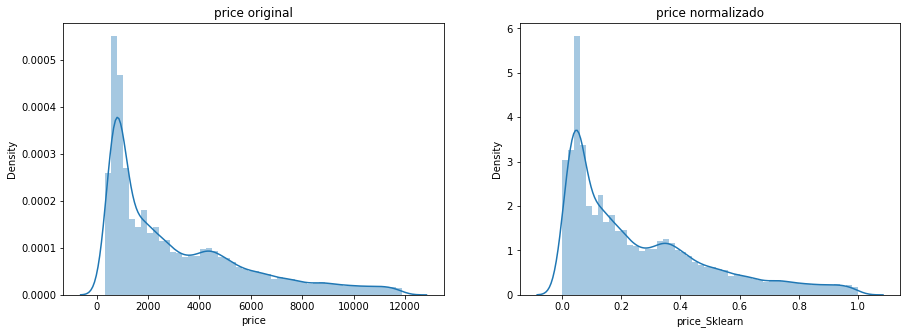

In [40]:
#Realizamos la grafica para comprobar como se ha modificado la distribución de los datos
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df['price_Sklearn'], ax = axes[1]);

In [42]:
# Realizamos el metodo Shapiro-Wilk para comprobar de  manera analítica
stats.shapiro(df["price_Sklearn"])

ShapiroResult(statistic=nan, pvalue=1.0)

Con este metodo tampoco conseguimos normalizar, a continuacón haremos el método manual

In [43]:
media = df["price"].mean()
maximo = df["price"].max() 
minimo = df["price"].min()

In [44]:
df["price_NORM"] = (df["price"] - media) / (maximo - minimo )

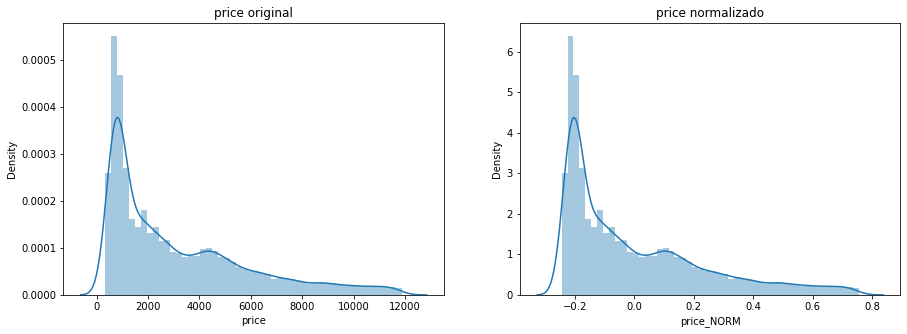

In [45]:
#Realizamos la grafica para comprobar como se ha modificado la distribución de los datos
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df["price_NORM"], ax = axes[1]);

In [46]:
# Realizamos el metodo Shapiro-Wilk para comprobar de  manera analítica
stats.shapiro(df["price_NORM"])

ShapiroResult(statistic=0.8511196970939636, pvalue=0.0)

Vemos que no lo podemos normalizar, con lo cual nos quedamos con la principal. Por ese motivo no guardamos el csv porque vamos a trabajar con el original.